This notebook was created by Alissa Ostapenko (aostapenko@wpi.edu) for WPI Army Research Laboratory.   
Date: 05/12/2020.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Principal Component Analysis
Here you will learn how to run linear and nonlinear kernel PCA and visualize the output.  
PCA is a **dimensionality reduction** technique which takes linear combinations of the predictors in our dataset to create a set of new **principal components**.  

Ideally, PCA will map our high-dimensional dataset to a lower space. 


For now, we have only used PCA for visualization purposes. However, it should be explored with models like the Support Vector Regressor, LDA, QDA, and other ML-based machine learning regression models (or classification models!) 

In [2]:
from DataPreprocessor import DataPreprocessor
from TrainTestPipeline import TrainTestPipeline
import pandas as pd

### Step 1: Initialize a DataPreprocessor object
As always, we must initialize a DataPreprocessor object. If you don't know what this is, please see the notebooks on Regression or Classification. 

Specify the:
 - **Data Folder** with raw, unprocessed CSV files of samples data (e.g., Ti-Nb-Zr (0-63)
     Particles.csv is in here)
 - **Flow Values Excel Sheet** with the target flow values and target flow classes.  
 This also includes the Augmented Density (AugDensity) that the materials science team provided for each sample.


**IMPORTANT:**   
* In the Flow Values Excel sheet, do **not** type outside of the colored rows, especially in rows below the data. If adding more data, make sure to follow the same format as in the sheet.     
* Make sure the names of your samples, and size ranges of the samples, match **exactly** with how they are named in each raw Excel data sheet in your data folder.  

In [3]:
data_folder = 'RawData'
flow_values_excel = 'TrueFlowValues_.xlsx'
dp = DataPreprocessor(data_folder, flow_values_excel)

### Step 2: Prepare the Data 
Files/folders \#1-3 above will be created in this step. 

Use the *prepare_df()* method to create files/folders \#1-3, if they have not been created already.

*Note: This may take a few minutes the first time you run it.*

In [4]:
success = dp.prepare_df()
assert success

### Step 3: Run PCA
Use the *DataPreprocessor*'s ```get_pca_x(...)``` to return a numpy matrix of principal compoennts. The inputs are:
* ```pca_type``` This can be one of: “linear” | “poly” | “rbf” | “sigmoid” | “cosine” | “precomputed” (default: 'linear')
* ```heldout_cols``` A list of parameter names to leave out from the PCA. (default: *None*)

This function returns a data matrix of the transformed X-data. Note that there is no interpretability to the data. Each column is a principal component, and each particle is now mapped into a different space. 


**PCA on Original Microtrac:**  
In the examples below, the original Microtrac parameters will be used for PCA. To use all parameters, including Augmented ones, leave out the *heldout_cols* argument entirely.  

We would like PCA to make our data more separable than it is. That will allow our models to better predict our target flowability values or classes.

**Note:** Any nonlinear kernel is run on a 2000-point subset of our dataset. Linear PCA can handle the whole dataset.   
We should rerun nonlinear PCA on more data, once we have the computational power! (also -- it's okay to run PCA on a subsample of the data... we just need a bigger subsample!)

In [6]:
# Linear pca
pca_lin = dp.get_pca_x(pca_type='linear', heldout_cols = ['MinSize', 'MaxSize', 'Density'])

In [7]:
# Polynomial-kernel pca
pca_poly = dp.get_pca_x(pca_type='poly', heldout_cols = ['MinSize', 'MaxSize', 'Density'])

In [8]:
# Radial Basis Function - kernel pca
pca_rbf = dp.get_pca_x(pca_type='rbf', heldout_cols = ['MinSize', 'MaxSize', 'Density'])

We can experiment with varying numbers of principal components to use for the X-Data. For example, if we want 5 components, use the first 5 columns of the transformed matrix. To decide how many components to use, we need to visualize the explained variance accumulated with each additional component. 

### Step 4: Visualize PCA
Use the *DataPreprocessor*'s ```visualize_pca(...)``` to visualize a plot of the first two principal components plotted against each other (with PC1 on the x-axis and PC2 on the y-axis). 

Each point is colored by its flowability (target can be a flowability number or a numeric class). 

**Input parameters:**
* ```transformed_data``` Output of running *get_pca_x(...)*
* ```targs``` The y_data used, either regression or classification targets
* ```out_file_name``` A *.pdf* filename to which to save output results to 



**Two plots will be generated:**
* A plot of the first 2 principal components plotted against each other, colored by the target. Ideally we'd like to see some recognizable decision boundary, or linear, or nonlinear relationship in the points... we don't see that.
* A plot of the cumulative explained variance. Use this to choose the number of components to use (we want 80-90% of the data's variance to be explained with the number of components we use). 

In [9]:
# in this example, get the regression values (the true flowability values)
y_regr = dp.get_regression_y()

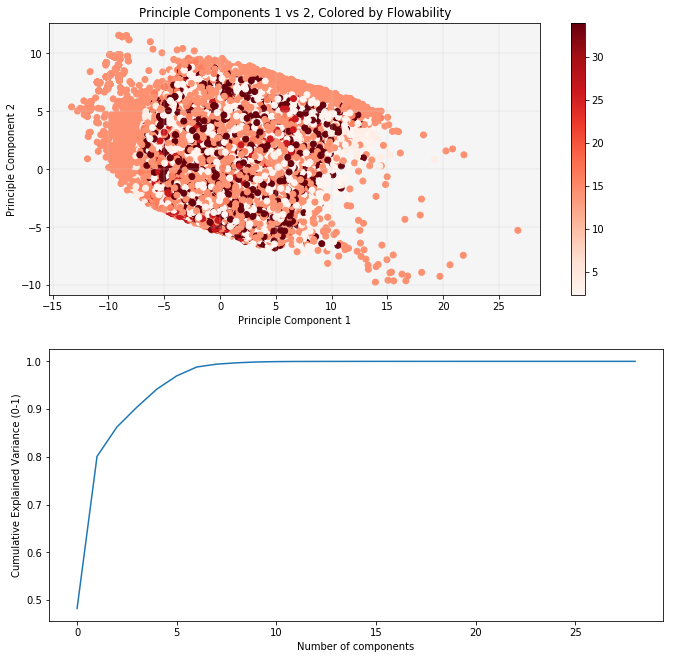

In [10]:
# Linear pca
dp.visualize_pca(transformed_data = pca_lin, targs = y_regr, 
                 out_file_name = "PCA_Linear_Microtrac.pdf")

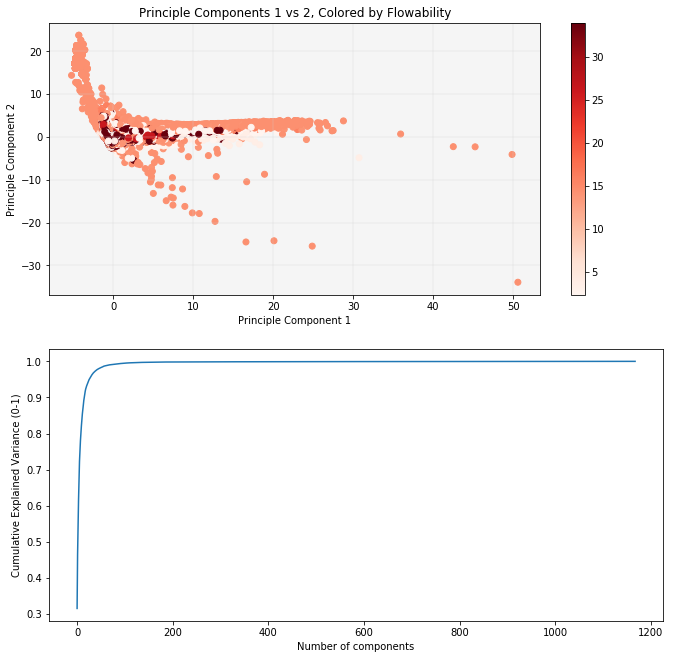

In [11]:
# Polynomial pca
dp.visualize_pca(transformed_data = pca_poly, targs = y_regr, 
                 out_file_name = "PCA_Polynomial_Microtrac.pdf")

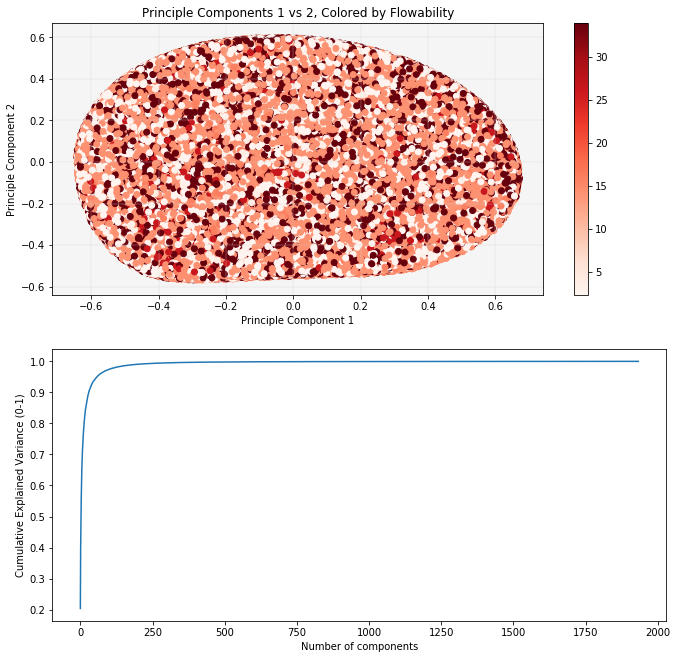

In [12]:
# Radial Basis Function - kernel pca
dp.visualize_pca(transformed_data = pca_rbf, targs = y_regr, 
                 out_file_name = "PCA_RBF_Microtrac.pdf")

After running these cells, you should see three new .pdf files: 
* *PCA_Linear_Microtrac.pdf*
* *PCA_Polynomial_Microtrac.pdf*
* *PCA_RBF_Microtrac.pdf*